In [69]:
#Predict Netflix Stock Prices using LSTM
'''
Zakaria BOUZIT/zaackq
22.08.2019
'''

'\nZakaria BOUZIT/zaackq\n22.08.2019\n'

In [70]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [71]:
#get the data
#https://finance.yahoo.com/quote/nflx/history/
from google.colab import drive 
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/MyDrive/NFLX.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-14,480.619995,488.989990,471.299988,476.260010,476.260010,7359100
1,2020-09-15,484.000000,497.470001,481.630005,495.989990,495.989990,5337000
2,2020-09-16,499.989990,504.660004,483.309998,483.859985,483.859985,4394900
3,2020-09-17,475.160004,478.399994,463.269989,470.200012,470.200012,5379300
4,2020-09-18,472.510010,479.399994,458.600006,469.959991,469.959991,6717700
...,...,...,...,...,...,...,...
246,2021-09-03,585.799988,591.880005,583.140015,590.530029,590.530029,2681200
247,2021-09-07,594.690002,613.849976,593.989990,606.710022,606.710022,5821400
248,2021-09-08,603.840027,615.599976,595.710022,606.049988,606.049988,5424500
249,2021-09-09,606.469971,609.440002,596.549988,597.539978,597.539978,2954200


In [72]:
#get the number of trading days 
df.shape

(251, 7)

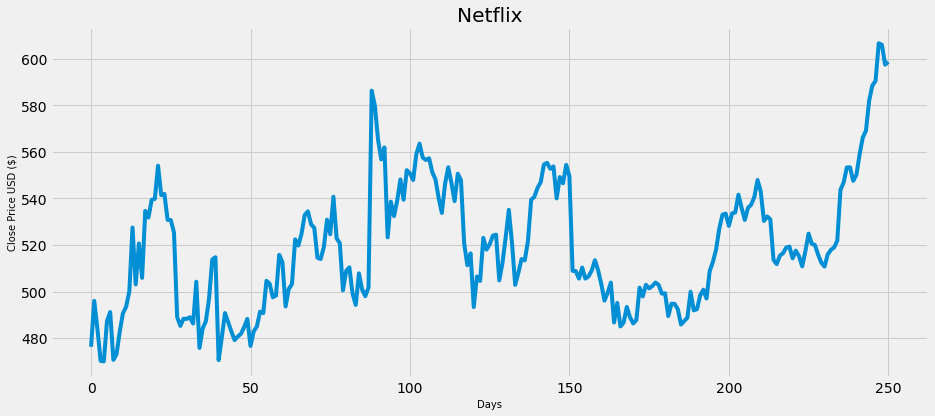

In [73]:
#visualize the Close price
plt.figure(figsize=(14,6))
plt.title('Netflix')
plt.xlabel('Days', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.plot(df['Close'])
plt.show()

In [74]:
#get the close price
df = df.filter(['Close'])
df

,Close
0,476.260010
1,495.989990
2,483.859985
3,470.200012
4,469.959991
...,...
246,590.530029
247,606.710022
248,606.049988
249,597.539978


In [75]:
#Create variable to predict 'x' days out into the futur
futur_days = 25
#create a new column 'target' shifted 'x' units/days up
df['Predictions'] = df[['Close']].shift(-futur_days)
df

,Close,Predictions
0,476.260010,530.719971
1,495.989990,525.419983
2,483.859985,489.049988
3,470.200012,485.230011
4,469.959991,488.279999
...,...,...
246,590.530029,NaN
247,606.710022,NaN
248,606.049988,NaN
249,597.539978,NaN


In [76]:
X = np.array(df.drop(['Predictions'],1))[:-futur_days]
X[0:5]

array([[476.26001 ],
       [495.98999 ],
       [483.859985],
       [470.200012],
       [469.959991]])

In [77]:
y = np.array(df['Predictions'])[:-futur_days]
y[0:5]

array([530.719971, 525.419983, 489.049988, 485.230011, 488.279999])

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [79]:
#Models
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [80]:
x_futur = df.drop(['Predictions'],1)[:-futur_days]
x_futur = x_futur.tail(futur_days)
x_futur = np.array(x_futur)
x_futur[0:5]

array([[533.539978],
       [533.97998 ],
       [541.640015],
       [535.960022],
       [530.76001 ]])

In [81]:
tree_prediction = tree.predict(x_futur)
lr_prediciton = lr.predict(x_futur)
for i in range(5):
  print('model1 prediction : {} | model2 prediction : {}'.format(tree_predicion[i],lr_prediciton[i]))

model1 prediction : 520.549988 | model2 prediction : 522.9361427439088
model1 prediction : 519.969971 | model2 prediction : 522.9971738573644
model1 prediction : 484.670013 | model2 prediction : 524.0596700850155
model1 prediction : 512.400024 | model2 prediction : 523.2718184452274
model1 prediction : 510.72000099999997 | model2 prediction : 522.5505432638815


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


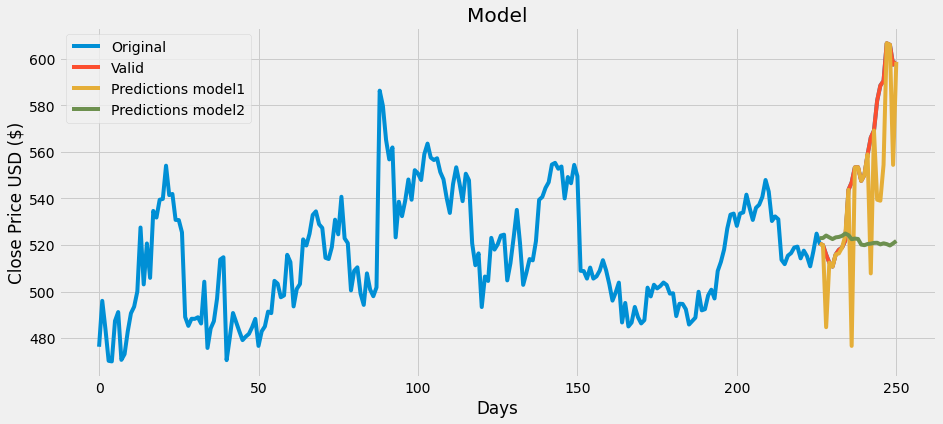

In [82]:
#Visualize 
predictions1 = tree_predicion
predictions2 = lr_prediciton
valid = df[X.shape[0]:]
valid['Predictions1']= predictions1
valid['Predictions2']= predictions2
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions1', 'Predictions2']])
plt.legend(['Original', 'Valid', 'Predictions model1', 'Predictions model2'])
plt.show()

In [83]:
#Model 1 is far better.
#end